# Depression Analysis using Tweets

In [ ]:
#import packages
import numpy as np
import pandas as pd
import re
from math import log, sqrt
import matplotlib.pyplot as plt

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
import nltk
import seaborn as sns

In [ ]:
#read the dataset
data=pd.read_csv("Depression.csv")
data

,Unnamed: 0,message,label
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0
...,...,...,...
10309,802309,No Depression by G Herbo is my mood from now o...,1
10310,802310,What do you do when depression succumbs the br...,1
10311,802311,Ketamine Nasal Spray Shows Promise Against Dep...,1
10312,802312,dont mistake a bad day with depression! everyo...,1


# Data Preprocessing

In [ ]:
data.shape

(10314, 3)

In [ ]:
data.describe()

,Unnamed: 0,label
count,10314.000000,10314.000000
mean,491253.470525,0.224355
std,261688.134407,0.417177
min,106.000000,0.000000
25%,263019.250000,0.000000
50%,514988.000000,0.000000
75%,773521.500000,0.000000
max,802313.000000,1.000000


In [ ]:
data.head()

,Unnamed: 0,message,label
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


In [ ]:
data.tail()

,Unnamed: 0,message,label
10309,802309,No Depression by G Herbo is my mood from now o...,1
10310,802310,What do you do when depression succumbs the br...,1
10311,802311,Ketamine Nasal Spray Shows Promise Against Dep...,1
10312,802312,dont mistake a bad day with depression! everyo...,1
10313,802313,0,1


In [ ]:
data.isnull().count

<bound method DataFrame.count of        Unnamed: 0  message  label
0           False    False  False
1           False    False  False
2           False    False  False
3           False    False  False
4           False    False  False
...           ...      ...    ...
10309       False    False  False
10310       False    False  False
10311       False    False  False
10312       False    False  False
10313       False    False  False

[10314 rows x 3 columns]>

In [ ]:
#removing the unwanted columns 
#here we removed unnamed:0 column
data.drop(['Unnamed: 0'], axis = 1, inplace = True)
data

,message,label
0,just had a real good moment. i missssssssss hi...,0
1,is reading manga http://plurk.com/p/mzp1e,0
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,@lapcat Need to send 'em to my accountant tomo...,0
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0
...,...,...
10309,No Depression by G Herbo is my mood from now o...,1
10310,What do you do when depression succumbs the br...,1
10311,Ketamine Nasal Spray Shows Promise Against Dep...,1
10312,dont mistake a bad day with depression! everyo...,1


In [ ]:
#here 0 - means positive tweet
# 1 - means Negative tweet
data['label'].value_counts()

0    8000
1    2314
Name: label, dtype: int64

In [ ]:
#information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10314 entries, 0 to 10313
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  10314 non-null  object
 1   label    10314 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 161.3+ KB


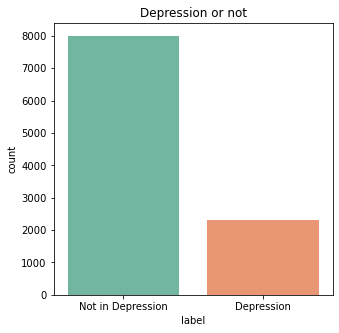

In [ ]:
# Barchart for viewing the depression and not depression people
plt.figure(figsize=(5, 5))
sns.countplot(x ="label",data=data, palette="Set2")
plt.title("Depression or not")
plt.xticks([1,0],['Depression','Not in Depression'])
plt.show()


# Word Cloud Analysis


Most Depressive Words

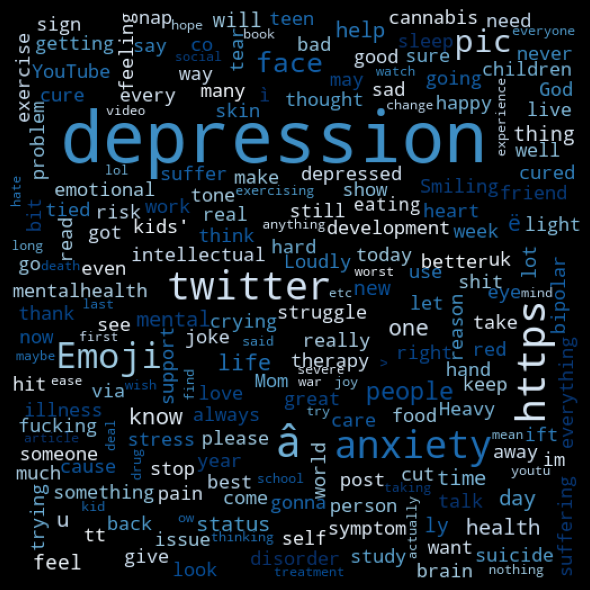

In [ ]:
#here we are finding most of the words used for depression
dep_words = ' '.join(list(data[data['label'] == 1]['message']))
dep_wcount = WordCloud(width = 512,height = 512, collocations=False, colormap="Blues").generate(dep_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(dep_wcount)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()


Most positive words

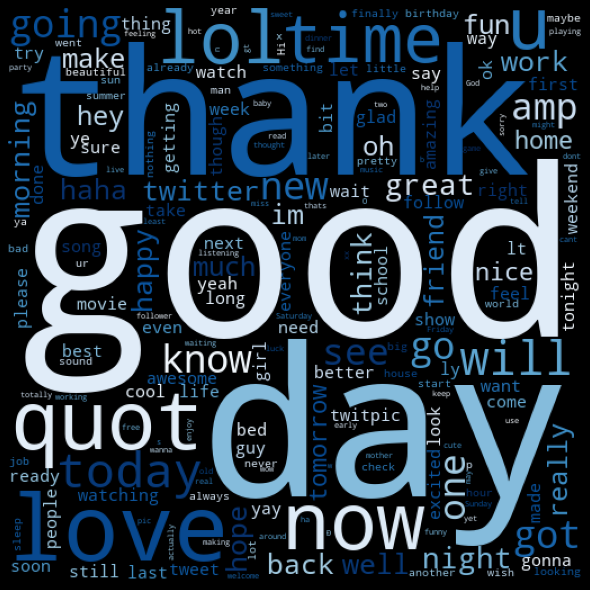

In [ ]:
positive_words = ' '.join(list(data[data['label'] == 0]['message']))
pos_wcount = WordCloud(width = 512,height = 512, collocations=False, colormap="Blues").generate(positive_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(pos_wcount)
plt.axis('off'), 
plt.tight_layout(pad = 0)
plt.show()

# split the datset as training and testing sets


In [1]:
#split the datset as training and testing sets

totalTweets = 8000 + 2314
trainIndex, testIndex = list(), list()
for i in range(data.shape[0]):
    if np.random.uniform(0, 1) < 0.98:
        trainIndex += [i]
    else:
        testIndex += [i]
train_D = data.iloc[trainIndex]
test_D = data.iloc[testIndex]



NameError: ignored

In [2]:
#training set count
train_D['label'].value_counts()

NameError: ignored

In [ ]:
#Test set count
test_D['label'].value_counts()

In [ ]:
train_D.head()

In [ ]:
test_D.head()

# NLTK Pre-Processing -Dataset for Training


1)Tokenization

2)stemming

3)removal of stop words


In [ ]:
def process_message(message, lower_case = True, stem = True, stop_words = True, gram = 2):
    if lower_case:
        message = message.lower()
    words = word_tokenize(message)
    words = [w for w in words if len(w) > 2]
    if gram > 1:
        w = []
        for i in range(len(words) - gram + 1):
            w += [' '.join(words[i:i + gram])]
        return w
    if stop_words:
        sw = stopwords.words('english')
        words = [word for word in words if word not in sw]
    if stem:
        stemmer = PorterStemmer()
        words = [stemmer.stem(word) for word in words]   
    return words


In [ ]:
class TweetClassifier(object):
    def __init__(self, train_D, method = 'tf-idf'):
        self.data, self.labels = train_D['message'], train_D['label']
        self.method = method

    def train(self):
        self.calc_TF_and_IDF()
        if self.method == 'tf-idf':
            self.calc_TF_IDF()
        else:
            self.calc_prob()

    def calc_prob(self):
        self.prob_depressive = dict()
        self.prob_positive = dict()
        for word in self.tf_depressive:
            self.prob_depressive[word] = (self.tf_depressive[word] + 1) / (self.dep_words + \
                                                                len(list(self.tf_depressive.keys())))
        for word in self.tf_positive:
            self.prob_positive[word] = (self.tf_positive[word] + 1) / (self.positive_words + \
                                                                len(list(self.tf_positive.keys())))
        self.prob_depressive_tweet, self.prob_positive_tweet = self.depressive_tweets / self.total_tweets, self.positive_tweets / self.total_tweets 


    def calc_TF_and_IDF(self):
        noOfMessages = self.data.shape[0]
        self.depressive_tweets, self.positive_tweets = self.labels.value_counts()[1], self.labels.value_counts()[0]
        self.total_tweets = self.depressive_tweets + self.positive_tweets
        self.dep_words = 0
        self.positive_words = 0
        self.tf_depressive = dict()
        self.tf_positive = dict()
        self.idf_depressive = dict()
        self.idf_positive = dict()
        for i in range(noOfMessages):
            message_processed = process_message(self.data.iloc[i])
            count = list() 
            
            for word in message_processed:
                if self.labels.iloc[i]:
                    self.tf_depressive[word] = self.tf_depressive.get(word, 0) + 1
                    self.dep_words += 1
                else:
                    self.tf_positive[word] = self.tf_positive.get(word, 0) + 1
                    self.positive_words += 1
                if word not in count:
                    count += [word]
            for word in count:
                if self.labels.iloc[i]:
                    self.idf_depressive[word] = self.idf_depressive.get(word, 0) + 1
                else:
                    self.idf_positive[word] = self.idf_positive.get(word, 0) + 1

    def calc_TF_IDF(self):
        self.prob_depressive = dict()
        self.prob_positive = dict()
        self.sum_tf_idf_depressive = 0
        self.sum_tf_idf_positive = 0
        for word in self.tf_depressive:
            self.prob_depressive[word] = (self.tf_depressive[word]) * log((self.depressive_tweets + self.positive_tweets) \
                                                          / (self.idf_depressive[word] + self.idf_positive.get(word, 0)))
            self.sum_tf_idf_depressive += self.prob_depressive[word]
        for word in self.tf_depressive:
            self.prob_depressive[word] = (self.prob_depressive[word] + 1) / (self.sum_tf_idf_depressive + len(list(self.prob_depressive.keys())))
            
        for word in self.tf_positive:
            self.prob_positive[word] = (self.tf_positive[word]) * log((self.depressive_tweets + self.positive_tweets) \
                                                          / (self.idf_depressive.get(word, 0) + self.idf_positive[word]))
            self.sum_tf_idf_positive += self.prob_positive[word]
        for word in self.tf_positive:
            self.prob_positive[word] = (self.prob_positive[word] + 1) / (self.sum_tf_idf_positive + len(list(self.prob_positive.keys())))
            
    
        self.prob_depressive_tweet, self.prob_positive_tweet = self.depressive_tweets / self.total_tweets, self.positive_tweets / self.total_tweets 
                    
    def classify(self, processed_message):
        pDepressive, pPositive = 0, 0
        for word in processed_message:                
            if word in self.prob_depressive:
                pDepressive += log(self.prob_depressive[word])
            else:
                if self.method == 'tf-idf':
                    pDepressive -= log(self.sum_tf_idf_depressive + len(list(self.prob_depressive.keys())))
                else:
                    pDepressive -= log(self.dep_words + len(list(self.prob_depressive.keys())))
            if word in self.prob_positive:
                pPositive += log(self.prob_positive[word])
            else:
                if self.method == 'tf-idf':
                    pPositive -= log(self.sum_tf_idf_positive + len(list(self.prob_positive.keys()))) 
                else:
                    pPositive -= log(self.positive_words + len(list(self.prob_positive.keys())))
            pDepressive += log(self.prob_depressive_tweet)
            pPositive += log(self.prob_positive_tweet)
        return pDepressive >= pPositive
    
    def predict(self, test_D):
        result = dict()
        for (i, message) in enumerate(test_D):
            processed_message = process_message(message)
            result[i] = int(self.classify(processed_message))
        return result

In [ ]:
def metrics(labels, predictions):
    true_pos, true_neg, false_pos, false_neg = 0, 0, 0, 0
    for i in range(len(labels)):
        true_pos += int(labels.iloc[i] == 1 and predictions[i] == 1)
        true_neg += int(labels.iloc[i] == 0 and predictions[i] == 0)
        false_pos += int(labels.iloc[i] == 0 and predictions[i] == 1)
        false_neg += int(labels.iloc[i] == 1 and predictions[i] == 0)

    precision = true_pos / (true_pos + false_pos)
    recall = true_pos / (true_pos + false_neg)
    Fscore = 2 * precision * recall / (precision + recall)
    accuracy = (true_pos + true_neg) / (true_pos + true_neg + false_pos + false_neg)

    print("\nPrecision: ", precision)
    print("\nRecall: ", recall)
    print("\nF-score: ", Fscore)
    print("\nAccuracy: ", accuracy)

In [ ]:
#tf-idf
sc_tf_idf = TweetClassifier(train_D,'tf-idf')
sc_tf_idf.train()
preds_tf_idf = sc_tf_idf.predict(test_D['message'])
metrics(test_D['label'], preds_tf_idf)


Precision:  0.9047619047619048

Recall:  0.4222222222222222

F-score:  0.5757575757575758

Accuracy:  0.8715596330275229


In [ ]:
# bow- bag of words
sc_bow = TweetClassifier(train_D, 'bow')
sc_bow.train()
preds_bow = sc_bow.predict(test_D['message'])
metrics(test_D['label'], preds_bow)


Precision:  0.9

Recall:  0.2

F-score:  0.32727272727272727

Accuracy:  0.8302752293577982


# Predictions using TF-IDF


TF-IDF = Term Frequency-Inverse Document Frequency (Information retrival and text mining and evaluate important words in the input document)

TF(t) =( No of times term t appears in a document) / (Total             number of terms in the document).

IDF(t) = log_e(Total number of documents / Number of documents            with term t in it).

Here we are predicting the twwets using TF-IDF and Bag of Words(BOW) methods

we are comparing those methods which one giving better accuracy and classifying the tweet correctly


#predicting Depressive Tweets

#True means the tweet is depressive tweet

In [ ]:
sentence_d = process_message('Lately I have been feeling unsure of myself as a person & an artist')
sc_tf_idf.classify(sentence_d)

True

In [ ]:
sentence_d = process_message('Hormonal changes that happen during pregnancy and childbirth can trigger changes in the brain that lead to mood swings. ')
sc_tf_idf.classify(sentence_d)

True

#Predicting Positive Tweets

#False means the tweet is Positive tweet ,it means the user is not in depress

In [ ]:
sentence_p = process_message('Happy Thursday everyone. Thought today was Wednesday so super happy tomorrow is Friday yayyyyy')
sc_tf_idf.classify(sentence_p)

False

In [ ]:
sentence_p = process_message('It’s the little things that make me smile. Got our new car today and this arrived with it')
sc_tf_idf.classify(sentence_p)

False

# Predictions using Bag-of-Words



i) get input

ii) cleaning

iii)tokenize

iv)Build Vocab

v) Generate Vectors

#predicting Depressive Tweets


In [ ]:
sentence_d = process_message('Hi hello depression and anxiety are the worst')
sc_bow.classify(sentence_d)

True

In [ ]:
sentence_d = process_message('Feeling down...')
sc_bow.classify(sentence_d)

False

#Predicting Positive Tweets

In [ ]:
sentence_p = process_message('Happy Thursday everyone. Thought today was Wednesday so super happy tomorrow is Friday yayyyyy')
sc_bow.classify(sentence_p) 

False